In [23]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from ipywidgets import widgets

In [3]:
# given data we want to fit
experiment = {"time":[0, 0.1, 0.2, 0.4, 0.8, 1], "y":[2.0081,  1.5512,  1.1903,  0.7160,  0.2562,  0.1495]}

In [4]:

def fitfunc(t, k):
    'Function that returns Ca computed from an ODE for a k'

    # initial condition

    y0 = [experiment["y"][0]]

    # Using odeint

    def forOdeint(y, t):
        dydt = -k * y
        return dydt
        
    #y = odeint(forOdeint, y0, t).T[0]

    # Using solve_ivp

    def forSolve_ivp(t, y):
        dydt = -k * y
        return dydt

    tspan = [0, 1] # from t=0 to t=1
    Casol = solve_ivp(forSolve_ivp, tspan, y0, t_eval = t)
    y = Casol.y[0]
    
    return y

In [5]:

k_fit, kcov = curve_fit(fitfunc, experiment["time"], experiment["y"], p0=[1])
print(f"k_fit: {k_fit}")
tfit = np.linspace(0,1,6)
fit = fitfunc(tfit, k_fit)

k_fit: [2.5889432]


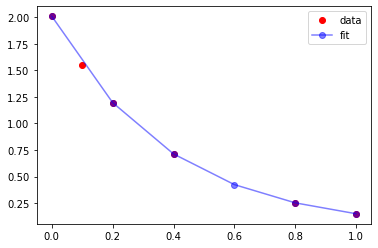

In [6]:
plt.plot(experiment["time"], experiment["y"], 'ro', label='data')
plt.plot(tfit, fit, 'bo-', label='fit', alpha=0.5)
plt.legend(loc='best')


In [202]:
style = {'description_width': 'initial'}

numberOfReaction = widgets.BoundedIntText(description="numberOfReaction", style = style)
nameOfReactants = widgets.Text(description="nameOfReactants", style = style)
nameOfParameters = widgets.Text(description="nameOfParameters", style = style)
parameterMinMaxStep = widgets.Text(description="parameterMinMaxStep", style = style)
kineticsWidget = [numberOfReaction, nameOfReactants, nameOfParameters, parameterMinMaxStep]

display(*kineticsWidget)

BoundedIntText(value=0, description='numberOfReaction', style=DescriptionStyle(description_width='initial'))

Text(value='', description='nameOfReactants', style=DescriptionStyle(description_width='initial'))

Text(value='', description='nameOfParameters', style=DescriptionStyle(description_width='initial'))

Text(value='', description='parameterMinMaxStep', style=DescriptionStyle(description_width='initial'))

In [204]:
def makeParameters():
    
    parametersWidgets = {}
    
    description = nameOfParameters.value.split(",")
    minMaxStep = parameterMinMaxStep.value.split(",")
    _min, _max, _step = [float(i.strip()) for i in minMaxStep]
    
    for i in range(numberOfReaction.value):
        parameterName = description[i].strip()
        floatSlider = widgets.FloatLogSlider(description=parameterName, style = style, min=_min, max=_max, step=_step)
        parametersWidgets[parameterName] = floatSlider
    
    return parametersWidgets

parametersWidgets = makeParameters()

display(*list(parametersWidgets.values()))


FloatLogSlider(value=1e-10, description='k1', max=-10.0, min=-40.0, step=0.001, style=SliderStyle(description_…

FloatLogSlider(value=1e-10, description='k2', max=-10.0, min=-40.0, step=0.001, style=SliderStyle(description_…

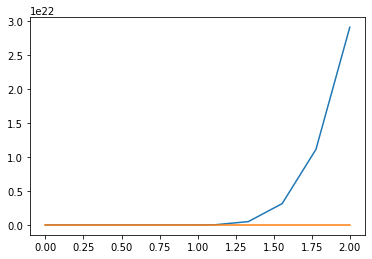

In [200]:
def rateFunction(t, z, *args, **kwargs):
    rate = {}
    parameterNames = nameOfReactants.value.split(",")
    for i in range(len(args)):
        name = parameterNames[i].strip()
        rate[name] = args[i] * z[i]
    
    return list(rate.values())

timeSimulateInterval = [0, 1]
initialConditions = [2, 2]

parameterValues = [widget.value for widget in list(parametersWidgets.values())]

solveDiffEq = solve_ivp(rateFunction, timeSimulateInterval, initialConditions, 
                        args=parameterValues, dense_output=True
                       )

timeSimulate = np.linspace(0, 2, 10)

plt.plot(timeSimulate, solveDiffEq.sol(timeSimulate).T)